![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# **NerDL - NerConverter**

This notebook will cover the different parameters and usages of `NerDL` and `NerConverter`. 

`NerDL` annotates text to find entities defined by the model. Examples for the features/entities are names of people, places, dates, organizations etc.

`NerConverter` converts an IOB or IOB2 representation of Named Entity Recognition (NER) to a user-friendly one, by associating the tokens of recognized entities and their label. 




**📖 Learning Objectives:**

1. Understand how `NerDL` and `NerConverter` algorithms work.

2. Understand how `NerDL` follows an unsupervised approach which builds upon features extracted from the text.

3. Become comfortable using the different parameters of the annotator.


**🔗 Helpful Links:**

`NerDL`

- Documentation : [NerDLModel](https://nlp.johnsnowlabs.com/docs/en/annotators#nerdl)

- Python Docs : [NerDLModel](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/ner/ner_dl/index.html#sparknlp.annotator.ner.ner_dl.NerDLModel)

- Scala Docs : [NerDLModel](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/annotators/ner/dl/NerDLModel)

- For extended examples of usage, see the [Spark NLP Workshop repository](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/4.NERDL_Training.ipynb).


<br/>

`NerConverter`

- Documentation : [NerConverter](https://nlp.johnsnowlabs.com/docs/en/annotators#nerconverter)

- Python Docs : [NerConverter](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/annotator/ner/ner_converter/index.html)

- Scala Docs : [NerConverter](https://nlp.johnsnowlabs.com/api/com/johnsnowlabs/nlp/annotators/ner/NerConverter.html)

- For extended examples of usage, see the [Spark NLP Workshop repository](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/3.SparkNLP_Pretrained_Models.ipynb).



## **📜 Background**

`NerDL` is the Named Entity Recognition (NER) annotator that allows to train generic NER model based on Neural Networks. The architecture of the neural network is a Char CNNs - BiLSTM - CRF that achieves state-of-the-art in most datasets.

The training data should be a labeled Spark Dataset, in the format of CoNLL 2003 IOB with type columns. The data should have columns of type and an additional label column of annotator type.


`NerDL` annotator will take a series of word embedding vectors, training CoNLL dataset, plus a validation dataset. `NerDL` will compute several layers of BI-LSTM in order to auto generate entity extraction, and it will leverage batch-based distributed calls to native TensorFlow libraries during prediction.

`NerDLApproach` annotator is used for training models and `NerDLModel` annotator is used extracting entities.

<br/>

`NerConverter` Converts a IOB or IOB2 representation of NER to a user-friendly one, by associating the tokens of recognized entities and their label. Results will be in CHUNK Annotation type. NER chunks can then be filtered by setting a whitelist with setWhiteList. Chunks with no associated entity (tagged "O") are filtered.




## **🎬 Colab Setup**

In [ ]:
! pip install -q pyspark==3.1.2  spark-nlp==4.2.4

In [ ]:
import sparknlp
import time

from pyspark.ml import PipelineModel, Pipeline
from sparknlp.annotator import *
from sparknlp.base import *
from sparknlp.training import *

from pyspark.sql.functions import when, col, array_contains

spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 4.2.4
Apache Spark version: 3.1.2


## **🖨️ Input/Output Annotation Types**

`NerDL`

- Input: `DOCUMENT`, `TOKEN`, `WORD_EMBEDDINGS`

- Output: `NAMED_ENTITY`

<br/>

`NerConverter`

- Input: `DOCUMENT`, `TOKEN`, `NAMED_ENTITY`

- Output: `CHUNK`

## **🔎 Parameters**

`NerDLModel`

- `setBatchSize`: (int) number of samples used in one iteration of training  (Default: `32`).

- `setIncludeConfidence`: (Boolean) whether to include confidence scores in annotation metadata (`Default`: False). 

- `setConfigProtoBytes`: (int) ConfigProto from tensorflow, serialized into byte array.

- `setIncludeAllConfidenceScores`: (Boolean) whether to include confidence scores for all tags rather than just for the predicted one.

- `setMinProbability` (Float) define the minimum probability value.


<br/>

`NerConverter`

- `setPreservePosition`: (Boolean) whether to preserve the original position of the tokens in the original document or use the modified tokens (`Default`: True).

- `setWhiteList` (list of str) if defined, list of entities to process.

<br/>

## **Selecting a Model from the John Snow Labs Models Hub**

Named Entity Recognition (NER) is a critical task in NLP, which involves identifying and classifying entities in a text into predefined categories such as names of people, organizations, locations, dates, etc. Selecting the right NER model is crucial as it directly impacts the accuracy and performance of the overall system that uses it.


[John Snow Labs Models Hub](https://nlp.johnsnowlabs.com/models) offers a wide range of pre-trained NER models that have been developed and fine-tuned for specific use cases, languages, and domains.

It is possible to train your own model by following the `NerDLApproach` Notebook, but selecting the right NER model from John Snow Labs Models Hub is critical for achieving high accuracy and precision in NER tasks. The availability of domain-specific and language-specific models, as well as the ability to customize the models, makes John Snow Labs Models Hub a valuable resource for NLP practitioners. 

The embeddings stage is also critical during NER model selection as the embeddings help the model to learn the semantic and contextual representations of words in the input text, which are essential for accurate entity recognition. Embeddings are essentially a vector representation of a word that captures its meaning and context in a high-dimensional space.

Pre-trained embeddings are particularly valuable as they can significantly improve the efficiency and generalization ability of the NER model. 

In the table below, there are five sample NER models, the entities they predict and the embeddings that were used.



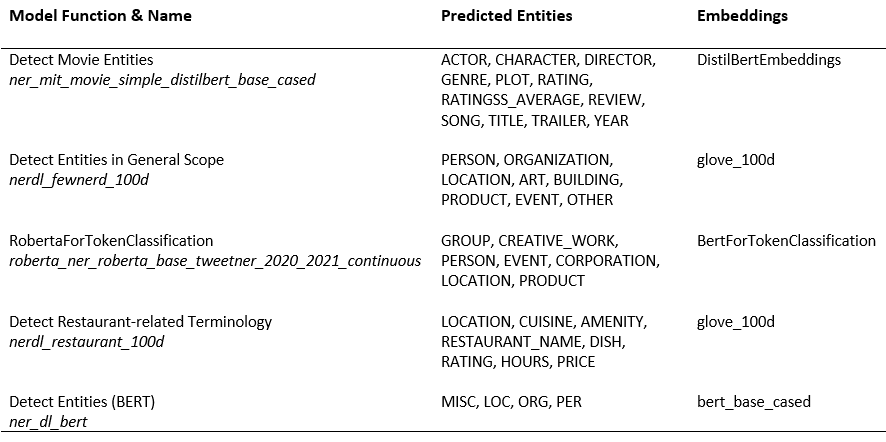

## **Use a 💎 Model From the John Snow Labs Models Hub**

Instead of training, saving, loading and getting predictions from a model, it is possible to use a model from the John Snow Labs Models Hub.

The model's name is [Detect Entities (Onto 100)](https://nlp.johnsnowlabs.com/2020/02/03/onto_100_en.html) and the model extracts various entities from a text. The model's homepage will give you detailed information about the model, its size, data source used for training, benchmarking (metrics about the performance) and a sample pipeline showing how to use it.

NER model does not read words directly but instead reads word embeddings, which represent words as points such that more semantically similar words are closer together.

The model was trained using GloVe 100d word embeddings, so same embeddings must be used in the pipeline.


<br/>
Predicted entities are as follows:

`CARDINAL`, `EVENT`, `WORK_OF_ART`, `ORG`, `DATE`, `GPE`, `PERSON`, `PRODUCT`, `NORP`, `ORDINAL`, `MONEY`, `LOC`, `FAC`, `LAW`, `TIME`, `PERCENT`, `QUANTITY`, `LANGUAGE`

We will download and use the **News Category** dataset. 

In [ ]:
!wget -q -O news_category_test.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv

In [ ]:
import pyspark.sql.functions as F

news_df = spark.read\
                .option("header", "true")\
                .csv("news_category_test.csv")\
                .withColumnRenamed("description", "text")

news_df.show(10, truncate=120)

+--------+------------------------------------------------------------------------------------------------------------------------+
|category|                                                                                                                    text|
+--------+------------------------------------------------------------------------------------------------------------------------+
|Business|Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Fede...|
|Sci/Tech| TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for priva...|
|Sci/Tech| A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of produ...|
|Sci/Tech| It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, bu...|
|Sci/Tech| Southern California's smog fighting agency went after emissions o

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

glove_embeddings = WordEmbeddingsModel.pretrained('glove_100d').\
    setInputCols(["document", 'token']).\
    setOutputCol("embeddings")

onto_ner = NerDLModel.pretrained("onto_100", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

nlpPipeline = Pipeline(stages=[documentAssembler, 
                               tokenizer,
                               glove_embeddings,
                               onto_ner])



glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]


### **♻️ Transform**

In Spark NLP, in order to put all the steps in stages and then retrieve the results, a **pipeline** is used. 

**fit()** will fit the model to the input training instances while **transform()** will perform predictions on the testing instances, based on the learned parameters during fitting. 

In [ ]:
result = nlpPipeline.fit(news_df).transform(news_df.limit(10))

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result, 
                                                 result.ner.result)).alias("cols")) \
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(40, truncate=100)

+------------+-------------+
|       token|    ner_label|
+------------+-------------+
|      Unions|            O|
|representing|            O|
|     workers|            O|
|          at|            O|
|      Turner|        B-ORG|
|      Newall|        I-ORG|
|         say|            O|
|        they|            O|
|         are|            O|
|           '|            O|
|disappointed|            O|
|           '|            O|
|       after|            O|
|       talks|            O|
|        with|            O|
|    stricken|            O|
|      parent|            O|
|        firm|            O|
|     Federal|        B-ORG|
|       Mogul|        I-ORG|
|           .|            O|
|     TORONTO|        B-GPE|
|           ,|            O|
|      Canada|        B-GPE|
|           A|            O|
|      second|    B-ORDINAL|
|        team|            O|
|          of|            O|
|  rocketeers|            O|
|   competing|            O|
|         for|            O|
|         the|

## **⚡ Getting the NER chunks with NER Converter**

`NerConverter` annotator converts a IOB format (short for inside, outside, beginning) or IOB2 representation of NER to a user-friendly one, by associating the tokens of recognized entities and their label. Results will be in CHUNK Annotation type.

NER chunks can then be filtered by setting a whitelist by using the `setWhiteList` parameter. 

Chunks with no associated entity (tagged "O") are filtered.

In [ ]:
ner_converter = NerConverter() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        glove_embeddings,
        onto_ner,
        ner_converter
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df.limit(10))

In [ ]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result, 
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------------+-----------+
|chunk                              |ner_label  |
+-----------------------------------+-----------+
|Turner   Newall                    |ORG        |
|Federal Mogul                      |ORG        |
|TORONTO                            |GPE        |
|Canada                             |GPE        |
|second                             |ORDINAL    |
|#36;10 million                     |CARDINAL   |
|Ansari X Prize                     |WORK_OF_ART|
|first                              |ORDINAL    |
|the University of Louisville       |ORG        |
|Mike Fitzpatrick                   |PERSON     |
|the day                            |DATE       |
|Southern California's              |LOC        |
|Friday                             |DATE       |
|first                              |ORDINAL    |
|British                            |NORP       |
|Department for Education and Skills|ORG        |
|""Music Manifesto""                |WORK_OF_ART|


### **🔦 Light Pipeline**

[LightPipeline](https://nlp.johnsnowlabs.com/docs/en/concepts#using-spark-nlps-lightpipeline) is a Spark NLP specific Pipeline class equivalent to the Spark ML Pipeline. 

The difference is that it’s execution does not hold to Spark principles, instead it computes everything locally (but in parallel) in order to achieve **fast results** when dealing with **small amounts of data**.

Let's use the same model on the short sample text below:

In [ ]:
light_model = LightPipeline(pipelineModel)

light_result = light_model.fullAnnotate("""On May 20, 2022, John Smith exhibited his latest work of art, titled "Memories of Paris", at the Louvre Museum. The exhibit, sponsored by the National Endowment for the Arts, 
                                           was a huge success, drawing over 10,000 visitors in its first week alone. Overall, the exhibit was a resounding success for John, who was thrilled with the response to his work. 
                                           The exhibit will be on display until June 20, 2022, and John plans to donate a percentage of the proceeds from the sale of his artwork to the National Endowment for the Arts.""")


chunks = []
entities = []

for n in light_result[0]['ner_chunk']:
        
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    
    
import pandas as pd

df = pd.DataFrame({'chunks':chunks, 'entities':entities})

df

,chunks,entities
0,"May 20, 2022",DATE
1,John Smith,PERSON
2,"""Memories of Paris"",",WORK_OF_ART
3,the Louvre Museum,ORG
4,the National Endowment for the Arts,ORG
5,"10,000",CARDINAL
6,its first week,DATE
7,John,PERSON
8,"June 20, 2022",DATE
9,John,PERSON


## **Parameters**

### **`NerDLModel`**

#### `setBatchSize`

The function of the `setBatchSize` parameter in NerDLModel is to control the memory usage and processing efficiency of the model during inference. When processing large volumes of text data, it can be computationally expensive and memory-intensive to process the entire input data at once. 

By setting the batch size, the model can process smaller batches of input data at a time, reducing the overall memory usage and increasing the processing efficiency.


#### `setIncludeConfidence`

The function of the `setIncludeConfidence` parameter is to provide additional information about the model's predictions. 

When this parameter is set to True, the NerDLModel will include the confidence score for each identified entity in its output. The confidence score represents the model's confidence that a given word or sequence of words belongs to a certain entity type.

In [ ]:
onto_ner = NerDLModel.pretrained("onto_100", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")\
    .setIncludeConfidence(True)

nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        glove_embeddings,
        onto_ner,
        ner_converter
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.ner.result, 
                                                 result.ner.metadata)).alias("cols"))\
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"),
                          F.expr("cols['2']['confidence']").alias("confidence"))

result_df.show(25, truncate=100)

onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]
+------------+---------+----------+
|       token|ner_label|confidence|
+------------+---------+----------+
|      Unions|        O|    0.9955|
|representing|        O|    0.9963|
|     workers|        O|    0.9932|
|          at|        O|    0.9986|
|      Turner|    B-ORG|    0.8648|
|      Newall|    I-ORG|      0.63|
|         say|        O|    0.9999|
|        they|        O|    0.9946|
|         are|        O|     0.989|
|           '|        O|    0.9958|
|disappointed|        O|    0.9848|
|           '|        O|     0.997|
|       after|        O|    0.9834|
|       talks|        O|    0.9992|
|        with|        O|    0.9984|
|    stricken|        O|    0.9979|
|      parent|        O|    0.9921|
|        firm|        O|    0.9932|
|     Federal|    B-ORG|     0.827|
|       Mogul|    I-ORG|    0.4488|
|           .|        O|    0.9999|
|     TORONTO|    B-GPE|    0.9553|
|     

#### `setIncludeAllConfidenceScores`

`setIncludeAllConfidenceScores` function is a configuration option for the NerDLModel that determines whether or not to include confidence scores for all possible entity labels. 

When set to true, the model will output confidence scores for all the possible labels, even if they are not the final predicted label for a given entity span.

In [ ]:
onto_ner = NerDLModel.pretrained("onto_100", 'en') \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")\
    .setIncludeAllConfidenceScores(True)

nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        glove_embeddings,
        onto_ner,
        ner_converter
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

result = pipelineModel.transform(news_df.limit(10))

result.select('ner').take(1)

onto_100 download started this may take some time.
Approximate size to download 13.5 MB
[OK!]


[Row(ner=[Row(annotatorType='named_entity', begin=0, end=5, result='O', metadata={'B-LAW': '0.0', 'B-GPE': '0.0', 'I-LOC': '0.0', 'I-QUANTITY': '0.0', 'I-PERCENT': '0.0', 'B-ORG': '0.0037', 'I-CARDINAL': '0.0', 'I-MONEY': '0.0', 'O': '0.9957', 'B-MONEY': '0.0', 'I-EVENT': '0.0', 'B-NORP': '0.0', 'B-ORDINAL': '0.0', 'B-PRODUCT': '0.0', 'B-PERCENT': '0.0', 'X': '0.0', 'I-DATE': '0.0', 'I-ORG': '3.0E-4', 'B-DATE': '2.0E-4', 'sentence': '0', 'I-TIME': '0.0', 'B-LOC': '0.0', 'I-GPE': '0.0', 'B-CARDINAL': '0.0', 'I-LAW': '0.0', 'I-WORK_OF_ART': '0.0', 'B-FAC': '0.0', 'B-LANGUAGE': '0.0', 'I-LANGUAGE': '0.0', 'B-QUANTITY': '0.0', 'I-NORP': '0.0', 'B-WORK_OF_ART': '0.0', 'B-EVENT': '0.0', 'B-TIME': '0.0', 'I-PRODUCT': '0.0', 'B-PERSON': '0.0', 'word': 'Unions', 'I-PERSON': '0.0', 'I-FAC': '0.0', 'I-ORDINAL': '0.0'}, embeddings=[]), Row(annotatorType='named_entity', begin=7, end=18, result='O', metadata={'B-LAW': '0.0', 'B-GPE': '0.0', 'I-LOC': '0.0', 'I-QUANTITY': '0.0', 'I-PERCENT': '1.0E-4',

### **`NerConverter`**

#### `setWhiteList`

In order to understand the function of this important parameter, let us run the code again, this time by using the `setWhiteList` parameter set to **ORG**. 

This means, we are only interested in the organizations and want to extract only those entities.

In [ ]:
ner_converter = NerConverter() \
    .setInputCols(["document", "token", "ner"]) \
    .setOutputCol("ner_chunk")\
    .setWhiteList(['ORG'])

nlpPipeline = Pipeline(
    stages=[
        documentAssembler, 
        tokenizer,
        glove_embeddings,
        onto_ner,
        ner_converter
        ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [ ]:
result = pipelineModel.transform(news_df.limit(10))

In [ ]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result, 
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-----------------------------------+---------+
|chunk                              |ner_label|
+-----------------------------------+---------+
|Turner   Newall                    |ORG      |
|Federal Mogul                      |ORG      |
|the University of Louisville       |ORG      |
|Department for Education and Skills|ORG      |
|Sophos.""  ""                      |ORG      |
|PGP                                |ORG      |
|PGP                                |ORG      |
|Wiltshire Police                   |ORG      |
+-----------------------------------+---------+

